In [13]:
!pip install streamlit

  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19572 sha256=46a12503a9eb6df2054fb4c7badb592a0edb3d74339d0f6d0764e1285f5e70d9
  Stored in directory: c:\users\tejas\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3


In [1]:

# #/html/body/form/div[3]

In [2]:
from base64 import decodestring # type of data storage
import pandas as pd
import tempfile # storing croped images in a temp folder
import time # time measure
import glob # read n number of images simultaneuosly from folder
from io import BytesIO 
import base64
import io
import cv2 # module for computer vision (preprocessing or analysing the images)
import os 
import numpy as np
import imutils # library for preprocessing
import sys 
from PIL import Image # to display images or read images
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# gives contour and bounding boxes of each images ( contour -> gives area of similarity in an image)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts] # box of images cropped( value of bounding box is value of 4 coordinates of cropped images) 
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse)) #Key value pairs
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [4]:
letters = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","J","K","L","M","N","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [5]:
le = LabelEncoder()
z=le.fit_transform(letters)

In [8]:
# data = pd.read_csv("E:\\Captcha_files\\output\\#e.csv")

In [6]:
img_cv = cv2.imread("data\\predict\\944.jpg") # reading individual images

In [7]:

#############################################################################
# converting to black and white images 
hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
lower_white = np.array([0, 0, 212], dtype=np.uint8)
upper_white = np.array([131, 255, 255], dtype=np.uint8)
mask = cv2.inRange(hsv, lower_white, upper_white)
kernel = np.ones((1,1),np.uint8)
img_e = cv2.erode(mask,kernel,iterations=2)
img_e=255-img_e
Capatcha_dir_1 = tempfile.mkdtemp()
cv2.imwrite(Capatcha_dir_1+"ba.jpg",img_e)
print(img_e.shape)
####################################################################
# croping to each letters and finally stored in to_model(variable)
img = cv2.imread(Capatcha_dir_1+"ba.jpg")
print(img.shape)
rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
black = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
print(black.shape)
kernel = np.ones((1,1), np.uint8)
dilate = cv2.erode(black,kernel,iterations = 1)
erode = cv2.dilate(dilate,kernel,iterations = 2)
ret,thresh = cv2.threshold(erode,1,255,cv2.THRESH_BINARY_INV)
img_dilation = cv2.erode(thresh,kernel,iterations = 2)
ctrs = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(ctrs)
cnts = sorted(cnts, key = cv2.contourArea, reverse = False)[:10]
(cnts, boundingBoxes) = sort_contours(cnts, method="left-to-right")
roi_images = []
for i, ctr in enumerate(cnts):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
#     print(x,y,w,h)
    if w>= 6 and h>=9 and w<=20: # condition of height and width of the image

        # Getting ROI (Region of Interest)
        roi = img[y:y+h, x:x+w]
#         roi =cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
        
        roi = cv2.resize(roi,(15,10))
#         roi = roi/255
#         roi =cv2.cvtColor(roi,cv2.COLOR_RGB2GRAY)
#         roi.reshape(1,-1)
#         roi = np.reshape(roi, (15,10,1))
        print(roi.shape)
        roi_images.append(roi)
        cv2.imwrite("data\\abc\\"+str(i)+".jpg",roi)

to_model =   np.array(roi_images)
# to_model = np.reshape(to_model,(6, 10, 15,1))

print(to_model.shape)
if to_model.shape[0] != 6:
    sys.exit()


(35, 100)
(35, 100, 3)
(35, 100)
(10, 15, 3)
(10, 15, 3)
(10, 15, 3)
(10, 15, 3)
(10, 15, 3)
(10, 15, 3)
(6, 10, 15, 3)


In [8]:
from IPython.display import Image 

1/1 [==============================] - 0s 175ms/step


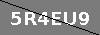

5R4EU9


In [17]:
# to_model = extract()
le = LabelEncoder()
le.fit_transform(letters)
model = load_model("data\\model2_10_15_3.h5")
pre = model.predict(to_model)
classes=np.argmax(pre,axis=1)
list_value = le.inverse_transform(classes)
captcha_value = "".join(list_value)
pil_img = Image(filename="data\\predict\\944.jpg")
display(pil_img)
print(captcha_value) # printing captcha value

In [9]:
tf.__version__

'2.3.1'

In [22]:
# To run app in web browser

!streamlit run StreamlitApp.py

^C
